Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 785195.5625 
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 789543.1250
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 789855.8750
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 808061.0625
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 808753.3750
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 779663.3125
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 789178.6875
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 791413.5000
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 797250.6250
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 791470.3125
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 791138.6875
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 776105.1250
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 783787.5000
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 700u

<Axes: >

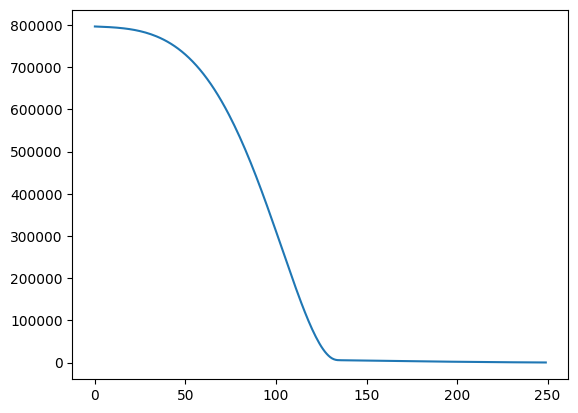

In [46]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")
# sbn.pairplot(dataFrame)
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.33,random_state=15)
xTest.shape
xTrain.shape
scaler= MinMaxScaler()
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

model = Sequential()
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop", loss="mse")
model.fit(xTrain,yTrain,epochs=250)
loss = model.history.history["loss"]
sns.lineplot(x=range(len(loss)), y=loss)

In [47]:
trainLose = model.evaluate(xTrain,yTrain,verbose=0)

In [48]:
testLose = model.evaluate(xTest,yTest,verbose=0)

In [49]:
testLose - trainLose

-11.429595947265625

In [50]:
predictions = model.predict(xTest)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [51]:
predictions

array([[1056.522  ],
       [ 652.92786],
       [ 877.34656],
       [ 892.36774],
       [ 896.86664],
       [ 497.9687 ],
       [ 925.8877 ],
       [ 979.3215 ],
       [ 935.8241 ],
       [1002.1522 ],
       [ 766.0496 ],
       [ 914.9746 ],
       [ 939.9049 ],
       [1036.1407 ],
       [1096.1556 ],
       [ 703.81616],
       [1099.4291 ],
       [ 675.7593 ],
       [1123.855  ],
       [ 886.5733 ],
       [ 891.93207],
       [ 736.1331 ],
       [ 505.13525],
       [ 641.2158 ],
       [ 840.9973 ],
       [1068.8369 ],
       [ 732.4582 ],
       [ 770.7514 ],
       [ 874.2189 ],
       [ 783.0265 ],
       [ 498.7665 ],
       [ 794.7775 ],
       [ 745.50116],
       [ 672.68317],
       [ 886.32135],
       [ 848.2043 ],
       [1019.27545],
       [1006.9202 ],
       [ 849.6438 ],
       [ 864.41046],
       [ 771.4165 ],
       [1142.0436 ],
       [1074.1227 ],
       [1065.5576 ],
       [ 875.4293 ],
       [ 628.58563],
       [1115.8542 ],
       [ 962.

In [52]:
predictDf = pd.DataFrame(yTest,columns=["Real y"])

In [53]:
predictions = pd.Series(predictions.reshape(330,),name = 'Predict Y')

In [54]:
predictions

0      1056.521973
1       652.927856
2       877.346558
3       892.367737
4       896.866638
          ...     
325     999.594238
326     800.626465
327     779.519836
328    1136.672241
329     810.910156
Name: Predict Y, Length: 330, dtype: float32

In [55]:
predictDf = pd.concat([predictDf,predictions], axis=1)

In [56]:
predictDf

,Real y,Predict Y
0,1081.652164,1056.521973
1,622.675990,652.927856
2,889.356810,877.346558
3,902.826733,892.367737
4,897.662404,896.866638
...,...,...
325,1028.438035,999.594238
326,789.934950,800.626465
327,758.490486,779.519836
328,1172.871659,1136.672241


<Axes: xlabel='Real y', ylabel='Predict Y'>

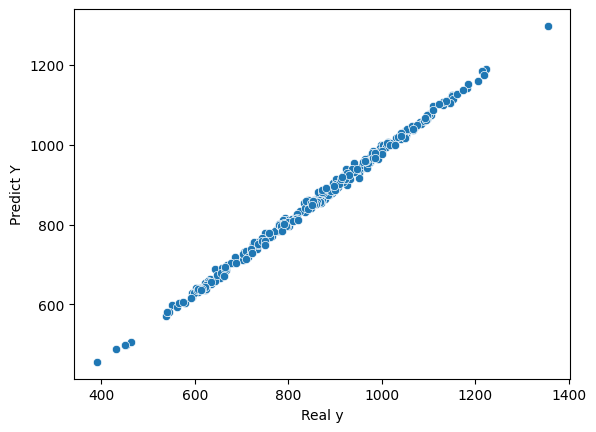

In [57]:
sns.scatterplot(x="Real y" , y="Predict Y" , data=predictDf)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mean_absolute_error(predictDf["Real y"], predictDf["Predict Y"])

15.946696638449335

In [60]:
mean_squared_error(predictDf["Real y"], predictDf["Predict Y"])

390.40261198368785

In [61]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [62]:
yeniBisikletOzellikleri = [[1750,1750]]

In [63]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [64]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[875.3956]], dtype=float32)

In [68]:
model.save("BicycleModel.keras")

In [69]:
sonradanCagrilanModel= load_model("BicycleModel.keras")

In [70]:
sonradanCagrilanModel.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[875.3956]], dtype=float32)